y = wx+c

#### Generating random regression datasets

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
x,y = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=4)
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size= 0.2,random_state= 1234)

In [3]:
x_test.shape,x_test.shape

((20, 1), (20, 1))

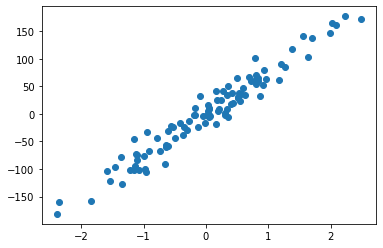

In [4]:
plt.scatter(x,y)

In [5]:
x[:5],y[:5]

(array([[-1.3474603 ],
        [ 0.3523434 ],
        [ 0.9546986 ],
        [ 0.03592805],
        [ 0.04800625]]),
 array([-126.24922409,   50.92876904,   63.15463302,    6.05472009,
          -5.72954025]))

![img.png](https://miro.medium.com/max/736/1*-Ftl7RWs1RsiaT9IJjrB-A.png)

![img.png](https://miro.medium.com/max/736/1*5LYDPHYkkNAP92oJNdwInw.png)

![img.png](https://miro.medium.com/max/324/1*wFX6avrS18DqdD_TNNvjTg.png)

In [17]:
class Linear_regression:
    
    def __init__(self, lr= 1, n_iters= 1000):
        self.lr = lr
        self.n_iters = n_iters # no. of iterations
        self.weights = None
        self.bias   = None
        
    def fit(self, x, y):
        #init parameter
        n_samples ,n_features = x.shape # defining sample size adn features
        self.weights = np.zeros(n_features)
        self.bias  = 0
        
        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(x,self.weights)+self.bias # y = wx+b
            
            # compute derivatives
            dw = (1/n_samples)*np.dot(x.T,(y_predicted-y)) 
            db = (1/n_samples)*np.sum(y_predicted-y)
            self.weights -= self.lr*dw
            self.bias = self.lr*db
            
    def predict(self,x):
        y_predicted = np.dot(x,self.weights)+self.bias
        return y_predicted

Let's say we multiply two matrices A and B. Then  the number of columns of A must be number of rows of B:
The size formula is: A(lxm) * B(mxn) = C(lxn)

In our example:

np.dot(X, self.weights) --> (80,1) * (1,) = (80,) -->for every sample we get one value (the 1 is because we have 1 feature)

and in the transposed case:

np.dot(X.T, (y_predicted - y)) --> (1, 80) * (80,) = (1,) --> for every feature we get one value

In [16]:
Regressor1 = Linear_regression()

In [8]:
Regressor1.fit(x_train,y_train)

In [9]:
predicted1  = Regressor1.predict(x_test)

In [10]:
def mse(y_true, y_pred):
    return np.mean((y_true-y_pred)**2)

In [11]:
mse_val1 = mse(y_test,predicted1)
mse_val1

15349.743610862479

##### customising lr rate

In [12]:
Regressor2 = Linear_regression(lr=0.01)# modified lr rate 0.01
Regressor2.fit(x_train,y_train)
predicted2  = Regressor2.predict(x_test)
mse_val2 = mse(y_test,predicted2)
mse_val2

306.2108600068704

##### plot for diff-diff lr rate 

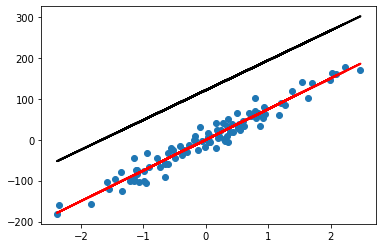

In [13]:
y_pred_1 = Regressor1.predict(x) # predict at lr 1
y_pred_2 = Regressor2.predict(x) # predict at lr  =0.01
plt.scatter(x,y)
plt.plot(x, y_pred_1, color='black', linewidth=2, label="Prediction")# predict at lr 1
plt.plot(x, y_pred_2, color='red', linewidth=2, label="Prediction")# predict at lr =0.01